In [1]:
import os
os.getcwd()

'C:\\Users\\pbhavsa\\Downloads\\OneDrive - MORNINGSTAR INC\\git\\technical_analysis\\notebooks'

In [2]:
# !python3 -m pip install -U scikit-mdr skrebate treeinterpreter imbalanced-learn xgboost tpot

In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
# import talib
# from talib.abstract import *


import matplotlib as mpl
import matplotlib.pyplot as plt
from treeinterpreter import treeinterpreter as ti

mpl.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, precision_score, \
                            recall_score, accuracy_score, recall_score, \
                            roc_curve, auc, roc_auc_score, precision_recall_curve

from imblearn.over_sampling import SMOTE

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import config

from collections import Counter, OrderedDict, defaultdict
import operator
import time
from pprint import pprint as pp

%matplotlib inline
np.random.seed(42)
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../data/training_data.csv').sort_values(by="Open time", ascending=True).drop('Open time', axis=1)
df.head()

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,AD,ADOSC,OBV,ATR,NATR,TRANGE,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,STDDEV,TSF,VAR,SMA,RSI,Returns_3hr
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71.829565,15.073580,59.390177,26.940050,0.600618,20.33,0.230934,0.939831,4475.283429,84.443950,4341.643714,10.279978,25.161816,4485.563407,633.116976,4368.5596,69.635783,-2.0
27886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,947.902940,75.797817,1005.083130,1.778334,0.572917,2.01,0.580944,0.974625,309.973429,0.596862,309.838000,0.010418,0.774121,309.983846,0.599264,307.2028,71.938214,-0.0
27887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,949.551527,73.386558,929.577870,1.814882,0.586278,2.29,0.564277,0.974810,309.673714,-2.754370,310.299143,-0.048110,0.757248,309.625604,0.573424,307.4968,69.445459,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71.703685,15.417307,58.807095,26.832189,0.600282,25.43,0.251967,0.943541,4484.267143,84.539958,4348.262857,10.461868,24.421524,4494.729011,596.410824,4374.5568,67.456669,-2.0
2,0,0,0,0,0,0,0,0,0,-100,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70.198043,13.677282,57.301453,27.960604,0.631550,42.63,0.597462,0.942052,4479.166857,83.621386,4362.877429,8.945341,19.853945,4488.112198,394.179144,4379.9940,61.893445,-1.0


In [5]:
df.dropna(inplace=True)
y = df.Returns_3hr
df.drop(['Returns_3hr', 'SMA'], axis=1, inplace=True)

xxx = ['CDLDOJI','CDLLONGLEGGEDDOJI','CDL3OUTSIDE','CDLMARUBOZU'
,'CDLRICKSHAWMAN','CDLHAMMER','CDLHANGINGMAN','CDLGRAVESTONEDOJI'
,'CDLMATCHINGLOW','CDLADVANCEBLOCK','CDL3INSIDE','CDLDRAGONFLYDOJI'
,'CDLTAKURI','CDLDOJISTAR','CDLINVERTEDHAMMER','CDLHARAMICROSS'
,'CDLSHOOTINGSTAR','CDLSEPARATINGLINES','CDLXSIDEGAP3METHODS'
,'CDLSTALLEDPATTERN']

low_importance_features = ['CDLHIKKAKEMOD','CDLHOMINGPIGEON','CDLMORNINGSTAR'
,'CDLEVENINGSTAR','CDL3LINESTRIKE','CDLGAPSIDESIDEWHITE'
,'CDLIDENTICAL3CROWS','CDL3WHITESOLDIERS','CDLTASUKIGAP'
,'CDLSTICKSANDWICH','CDLTHRUSTING','CDLMORNINGDOJISTAR'
,'CDLEVENINGDOJISTAR','CDLPIERCING','CDLDARKCLOUDCOVER','CDLUNIQUE3RIVER'
,'CDLTRISTAR','CDLRISEFALL3METHODS','CDL3BLACKCROWS','CDLLADDERBOTTOM'
,'CDL2CROWS','CDLCOUNTERATTACK','CDLBREAKAWAY','CDLONNECK'
,'CDLCONCEALBABYSWALL','CDLINNECK','CDLUPSIDEGAP2CROWS'
,'CDLKICKINGBYLENGTH','CDLKICKING','CDLABANDONEDBABY','CDL3STARSINSOUTH'
,'CDLMATHOLD']

df.drop(low_importance_features, axis=1, inplace=True)
X = df.values
Counter(y)

Counter({-5.0: 2548,
         -4.0: 1483,
         -3.0: 2876,
         -2.0: 5375,
         -1.0: 11281,
         -0.0: 46211,
         1.0: 10376,
         2.0: 5205,
         3.0: 2949,
         4.0: 1560,
         5.0: 3001})

In [6]:
# from tpot import TPOTClassifier
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     train_size=0.80, 
#                                                     test_size=0.20,
#                                                     stratify=y, # For splitting imbalanced dataset
#                                                     random_state=42)
# print('Splitting complete')


# X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)
# print('Oversampling complete')

# # from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# # from sklearn.feature_selection import VarianceThreshold

# # tpot_config = {
# #     'sklearn.ensemble.RandomForestClassifier': random_grid,
# #     'sklearn.feature_selection.VarianceThreshold': {}
# # }

# # http://epistasislab.github.io/tpot/api/
# # http://epistasislab.github.io/tpot/using/#customizing-tpots-operators-and-parameters
# # https://stackoverflow.com/questions/36633460/ how-to-get-feature-names-selected-by-feature-elimination-in-sklearn-pipeline?rq=1
# tpot = TPOTClassifier(generations=5, 
#                       population_size=20,
#                       cv=5,
#                       config_dict=None, # Can be "TPOT MDR"
#                       verbosity=2,
#                       early_stop=2,
#                       n_jobs=-1)

# tpot.fit(X_resampled, y_resampled)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_pipeline.py')

In [7]:
# # Number of trees in random forest
# n_estimators = [100]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = None
# # max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
# #                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# random_grid

In [8]:
# from tpot import TPOTClassifier
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     train_size=0.80, 
#                                                     test_size=0.20,
#                                                     stratify=y, # For splitting imbalanced dataset
#                                                     random_state=42)
# print('Splitting complete')


# X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)
# print('Oversampling complete')

# # from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# # from sklearn.feature_selection import VarianceThreshold

# tpot_config = {
#     'sklearn.ensemble.RandomForestClassifier': random_grid
# #     'sklearn.feature_selection.VarianceThreshold': {}
# }

# # http://epistasislab.github.io/tpot/api/
# # http://epistasislab.github.io/tpot/using/#customizing-tpots-operators-and-parameters
# # https://stackoverflow.com/questions/36633460/ how-to-get-feature-names-selected-by-feature-elimination-in-sklearn-pipeline?rq=1
# tpot = TPOTClassifier(generations=5, 
#                       population_size=10,
#                       cv=5,
#                       config_dict=tpot_config, # Can be "TPOT MDR"
#                       verbosity=2,
#                       early_stop=2,
#                       n_jobs=-1)

# tpot.fit(X_resampled, y_resampled)
# print(tpot.score(X_test, y_test))

# tpot.export('tpot_pipeline.py')

In [9]:
# list(tpot.fitted_pipeline_.steps[1][1].feature_importances_

In [10]:
# print(len(tpot.fitted_pipeline_.steps[1][1].feature_importances_))
# len(df.columns)


In [11]:
# importance = tpot.fitted_pipeline_.steps[1][1].feature_importances_
# pd.DataFrame({
#     'Feature_name': df.drop[''].columns,
#     'Importance': importance[:69]
# }).sort_values(['Importance'], ascending=False)

In [12]:
X.shape

(92865, 45)

In [13]:
y.shape

(92865,)

In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from tpot.builtins import StackingEstimator

x1 = X[:80000]
y1 = y[:80000]
# Creating training and testing data
training_features, testing_features, training_target, testing_target = train_test_split(x1, y1, 
                                                                                        train_size=0.80, 
                                                                                        test_size=0.20,
                                                                                        stratify=y1,
                                                                                        random_state=42)
# Over-sampling training data
X_resampled, y_resampled = SMOTE().fit_sample(training_features, training_target)

normalizer = StandardScaler()
X_resampled = normalizer.fit_transform(X_resampled)
testing_features = normalizer.transform(testing_features)

# Training Model
exported_pipeline = RandomForestClassifier(bootstrap=False, max_features='auto', 
#                                            max_depth=30,
                                           min_samples_leaf=1, min_samples_split=5, 
#                                            max_leaf_nodes=80,
                                           n_estimators=80, 
                                           criterion='gini',
                                           n_jobs=-1)

exported_pipeline.fit(X_resampled, y_resampled)
y_pred = exported_pipeline.predict(testing_features)
print(time.ctime())
# print(r2_score(testing_target, y_pred))
print('Training test acc:', accuracy_score(testing_target, y_pred))

Tue Jun 12 14:30:16 2018
Training test acc: 0.6658125


In [16]:
validation_testing_features = normalizer.transform(X[80000:])
validation_y_actual = y[80000:]
validation_y_pred = exported_pipeline.predict(validation_testing_features)
print('Validation test acc:', accuracy_score(validation_y_actual, validation_y_pred))

Validation test acc: 0.798523124757


In [17]:
exported_pipeline

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
def full_form(x):
    try:
        return config.tickers[x]
    except:
        return x
        

importance = exported_pipeline.feature_importances_
feature_set = {
    'Feature_name': df.columns,
    'Importance': importance
}

f = pd.DataFrame(feature_set).sort_values(['Importance'], ascending=False)
f['full_name'] = f.Feature_name.apply(full_form)
f['Importance'] = f['Importance'].apply(lambda x: np.round(x,4)) 
bad_features = f[f.Importance < 0.01].Feature_name
print('Low importance features:', bad_features.values)
f.to_csv('feature_importance.csv')
f

Low importance features: ['CDLENGULFING' 'CDLHIGHWAVE' 'CDLDOJI' 'CDLLONGLEGGEDDOJI' 'CDLMARUBOZU'
 'CDLHARAMI' 'CDLRICKSHAWMAN' 'CDL3OUTSIDE' 'CDLHAMMER' 'CDLGRAVESTONEDOJI'
 'CDLHANGINGMAN' 'CDLMATCHINGLOW' 'CDLTAKURI' 'CDLDRAGONFLYDOJI'
 'CDLINVERTEDHAMMER' 'CDLADVANCEBLOCK' 'CDLDOJISTAR' 'CDLHARAMICROSS'
 'CDL3INSIDE' 'CDLSEPARATINGLINES' 'CDLSHOOTINGSTAR' 'CDLXSIDEGAP3METHODS'
 'CDLSTALLEDPATTERN']


,Feature_name,Importance,full_name
40,LINEARREG_SLOPE,0.1055,LINEARREG_SLOPE
33,NATR,0.0969,Normalized Average True Range
38,LINEARREG_ANGLE,0.0968,LINEARREG_ANGLE
44,RSI,0.0923,Relative Strength Index
30,ADOSC,0.0616,Chaikin A/D Oscillator
31,OBV,0.0527,On Balance Volume
29,AD,0.0509,Chaikin A/D Line
39,LINEARREG_INTERCEPT,0.0391,LINEARREG_INTERCEPT
42,TSF,0.0375,TSF
37,LINEARREG,0.0373,LINEARREG


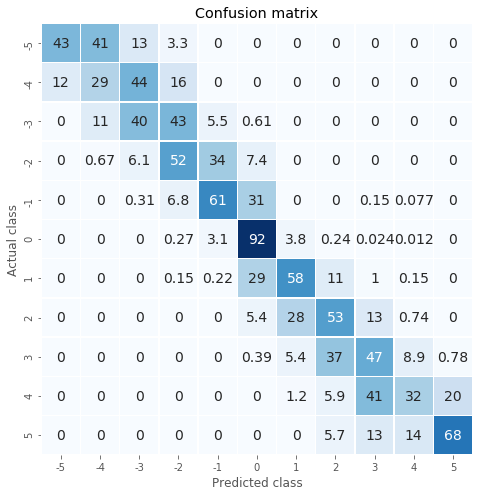

In [19]:
def confusion_plot(y_test, y_predicted, classes):
    cm = confusion_matrix(y_test, y_predicted)

    # Scaling values
    cm = cm.astype('float')*100 / cm.sum(axis=1)[:, np.newaxis] 
    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(7,7)) #subplot size

    hm = sns.heatmap(cm, 
                cbar=False,
                annot=True, 
                square=True,
                yticklabels=classes,
                xticklabels=classes,
                cmap='Blues',
                linewidths =.5,
                annot_kws={'size':14} #text size
                )
    plt.title('Confusion matrix')
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')
    plt.tight_layout()
#     plt.savefig('confusion_matrix.png', dpi=100)
    plt.show()

confusion_plot(validation_y_actual, validation_y_pred,[-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [20]:
predicted = np.argmax(exported_pipeline.predict_proba(validation_testing_features), axis=1) - 5
prob = np.max(exported_pipeline.predict_proba(validation_testing_features), axis=1)

In [21]:
def _color_red_or_green(val):
    color = 'red' if val < 0.5 else 'green'
    return 'color: %s' % color

In [22]:
validation_testing_features

array([[-0.0035448 ,  0.00677394,  0.13422416, ..., -0.64113448,
        -0.20608754, -0.93954255],
       [-0.0035448 ,  6.63511007,  0.13422416, ..., -0.48507201,
        -0.20550887,  1.01715842],
       [-0.0035448 ,  0.00677394,  0.13422416, ..., -0.64113448,
        -0.20608754, -0.62154135],
       ..., 
       [-0.0035448 ,  0.00677394,  0.13422416, ..., -0.50745041,
        -0.20599447,  1.23158909],
       [-0.0035448 ,  0.00677394,  0.13422416, ..., -0.61450588,
        -0.20608179,  1.42494441],
       [-0.0035448 ,  0.00677394,  0.13422416, ..., -0.64113448,
        -0.20608754,  0.90562222]])

In [23]:
cutoff_prob = 0.4
cutoff_returns = 2

df_result = pd.DataFrame({
    'predicted': validation_y_pred,
    'actual_returns': validation_y_actual,
    'prob': prob
})


df_result_final = df_result[(np.absolute(df_result.predicted)>=cutoff_returns) 
                            & (df_result.prob>=cutoff_prob) 
#                             &(df_result.predicted==df_result.true_label)
                           ]
print(len(df_result_final)/len(df_result))
# df_result_final.style.applymap(_color_red_or_green, subset=['prob'])
df_result_final.head()

0.08153905946366109


,actual_returns,predicted,prob
52580,-2.0,-2.0,0.418750
52581,-3.0,-2.0,0.439583
52583,-3.0,-3.0,0.608333
69171,-2.0,-2.0,0.514583
52584,-4.0,-4.0,0.426042


In [33]:
trade_amount = 100
transaction_charge = 0.25/100*2
crypto_slippage = 0.97**2
currency_slippage = 0.995**2


def returns(pred, true_):
    if pred>=2: 
        if true_>=pred:
            return pred
        else:
            return true_
    if pred<=-2:
        if true_<=pred:
            return -pred
        else:
            return -true_

df_result_final['Action'] = df_result_final['predicted'].apply(lambda x: 'Long' if x>0 else 'Short')
df_result_final['realised_returns'] = df_result_final.apply(lambda row: returns(row['predicted'], row['actual_returns']), axis=1)
df_result_final['profit'] = df_result_final.apply(lambda row: row['prob']*row['realised_returns']*np.sqrt(np.absolute(row['predicted'])/2)*0.01*trade_amount*(1-transaction_charge)*crypto_slippage*currency_slippage, axis=1)
print('Net profit:', df_result_final['profit'].sum())
df_result_final.head(n=10)

Net profit: 1393.0507017


,actual_returns,predicted,prob,Action,realised_returns,profit
52580,-2.0,-2.0,0.418750,Short,2.0,0.776243
52581,-3.0,-2.0,0.439583,Short,2.0,0.814862
52583,-3.0,-3.0,0.608333,Short,3.0,2.071673
69171,-2.0,-2.0,0.514583,Short,2.0,0.953890
52584,-4.0,-4.0,0.426042,Short,4.0,2.233777
24699,-2.0,-2.0,0.592708,Short,2.0,1.098712
52585,-4.0,-4.0,0.653125,Short,4.0,3.424396
24700,-2.0,-2.0,0.587500,Short,2.0,1.089057
69173,-4.0,-4.0,0.476042,Short,4.0,2.495932
52587,-3.0,-4.0,0.530208,Short,3.0,2.084949


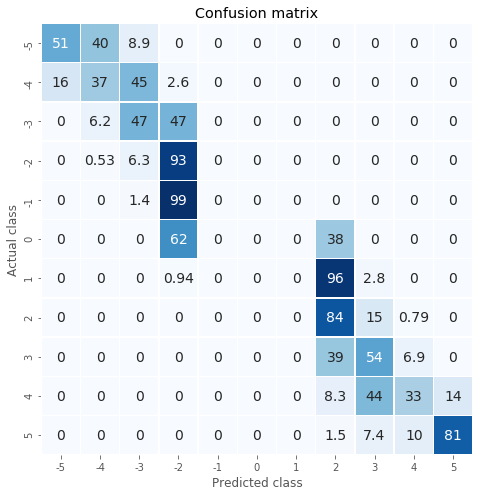

In [37]:
confusion_plot(df_result_final.actual_returns, df_result_final.predicted, [-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [34]:
print('Wrong predictions')
df_result_final[df_result_final.actual_returns!=df_result_final.predicted].head(n=30)

Wrong predictions


,actual_returns,predicted,prob,Action,realised_returns,profit
52581,-3.0,-2.0,0.439583,Short,2.0,0.814862
52587,-3.0,-4.0,0.530208,Short,3.0,2.084949
69174,-5.0,-4.0,0.478125,Short,4.0,2.506855
69175,-5.0,-4.0,0.502083,Short,4.0,2.632470
52590,-3.0,-2.0,0.492708,Short,2.0,0.913340
69177,-5.0,-4.0,0.534375,Short,4.0,2.801779
69178,-5.0,-4.0,0.550000,Short,4.0,2.883702
24705,-1.0,-2.0,0.583333,Short,1.0,0.540667
69179,-5.0,-4.0,0.409375,Short,4.0,2.146392
24713,-1.0,-2.0,0.492708,Short,1.0,0.456670


In [35]:
print('Lost money')
df_result_final[df_result_final.realised_returns<0].head(n=30)

Lost money


,actual_returns,predicted,prob,Action,realised_returns,profit
89767,1.0,-2.0,0.438542,Short,-1.0,-0.406465


In [36]:
print('Net profit:', df_result_final['profit'].sum())

Net profit: 1393.0507017


In [26]:
print('Number of days', validation_y_pred.shape[0]/96/4)

Number of days 33.502604166666664
